In [64]:
from datetime import datetime, timedelta
from jellyfish import utils
from jellyfish.candles_loader import load_candles_history


client = utils.load_binance_client()
end_dt = datetime(year=2022, month=2, day=3)
start_dt = end_dt - timedelta(hours=400)
pair = 'XRPUSDT'
interval = '1h'
df = load_candles_history(client, pair, start_dt, end_dt, interval)
df.head()

100%|██████████| 1/1 [00:00<00:00, 74.69it/s]


,Close,High,Low,NumOfTrades,Open,QuoteAssetVolume,TakerBuyAssetVolume,TakerSellAssetVolume,Volume
Date,,,,,,,,,
2022-01-17 02:59:00,0.7759,0.7805,0.7749,6554.0,0.7785,4.848772e+06,3140707.0,2.440918e+06,6238516.0
2022-01-17 03:59:00,0.7759,0.7767,0.7736,5322.0,0.7760,3.383783e+06,1923478.0,1.490966e+06,4365627.0
2022-01-17 04:59:00,0.7756,0.7763,0.7735,5660.0,0.7759,3.516791e+06,2060619.0,1.596717e+06,4538922.0
2022-01-17 05:59:00,0.7671,0.7768,0.7659,9168.0,0.7756,6.501034e+06,3333972.0,2.571889e+06,8428995.0
2022-01-17 06:59:00,0.7622,0.7684,0.7616,10601.0,0.7670,7.129656e+06,4552029.0,3.483940e+06,9315307.0


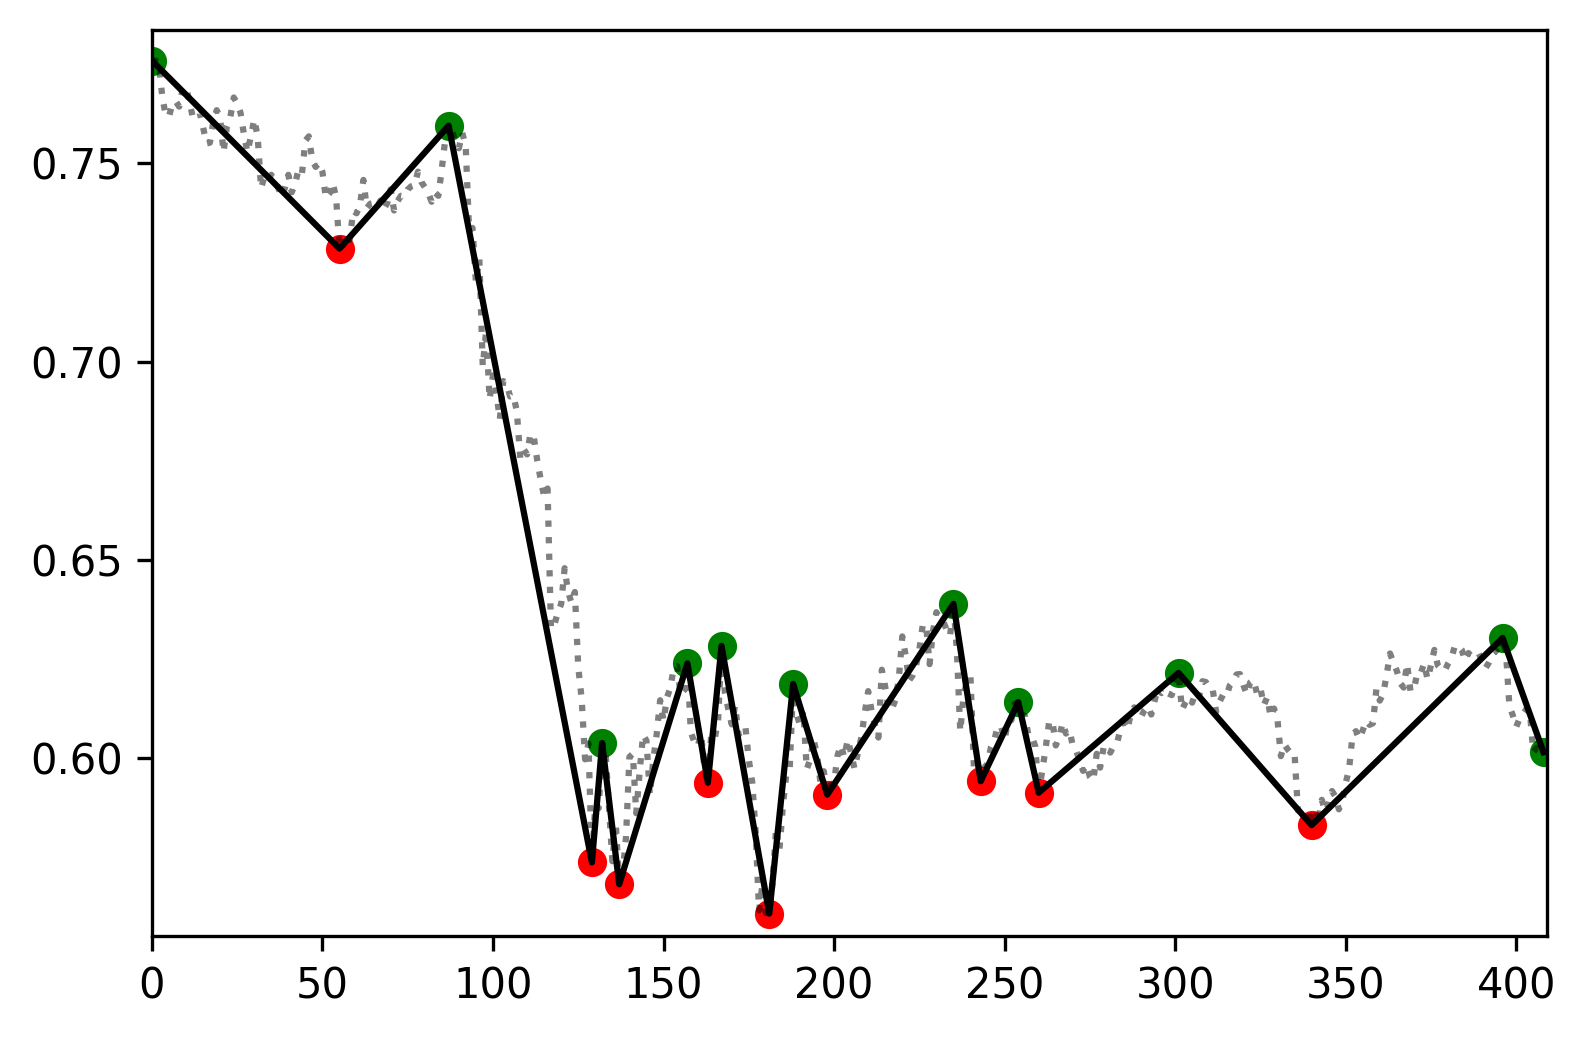

In [68]:
from zigzag import peak_valley_pivots
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = df.Close.to_numpy()
pivots = peak_valley_pivots(X, 0.03, -0.03)

def plot_pivots(X, pivots):
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

plt.figure(dpi=300)
plot_pivots(X, pivots)

In [69]:
X.shape, pivots.shape

((409,), (409,))

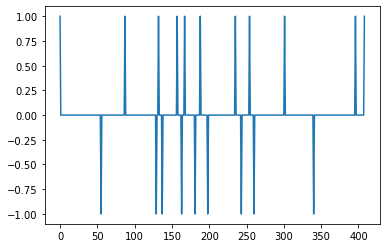

In [70]:
plt.plot(pivots)

In [72]:
pivots[0], pivots[-1]

(1, 1)